

# **Library Files**


In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Flatten
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

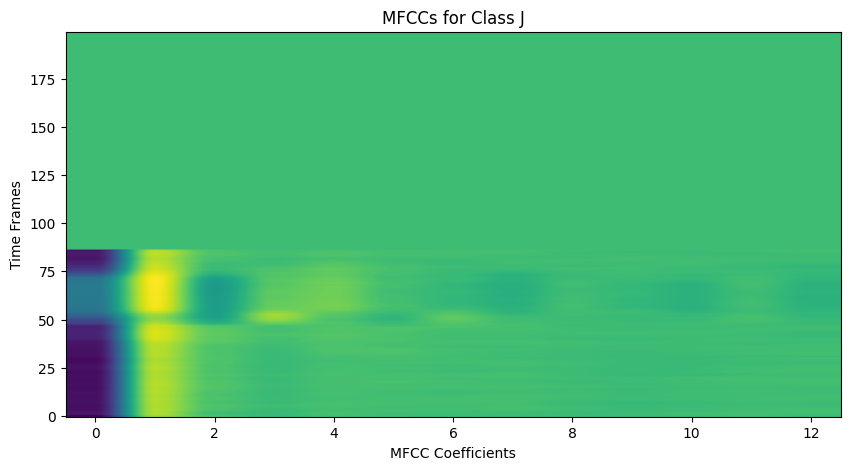

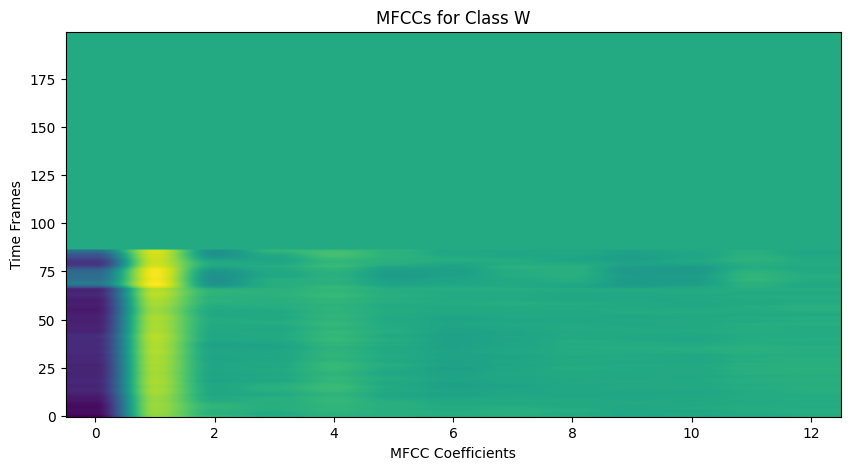

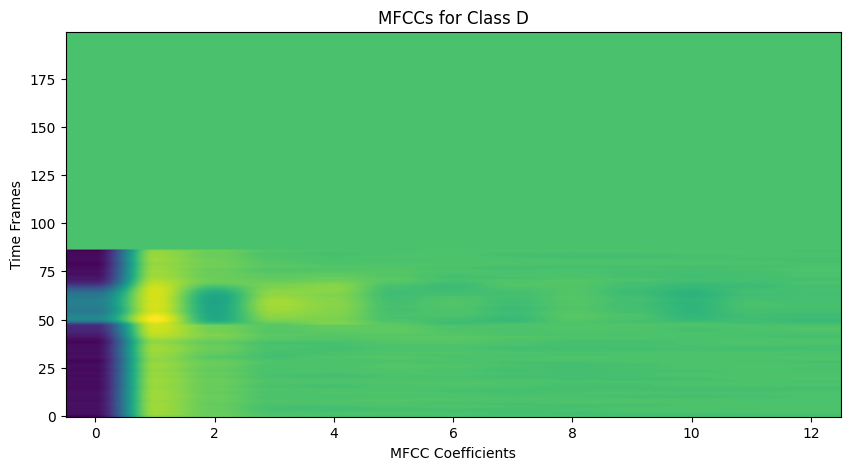

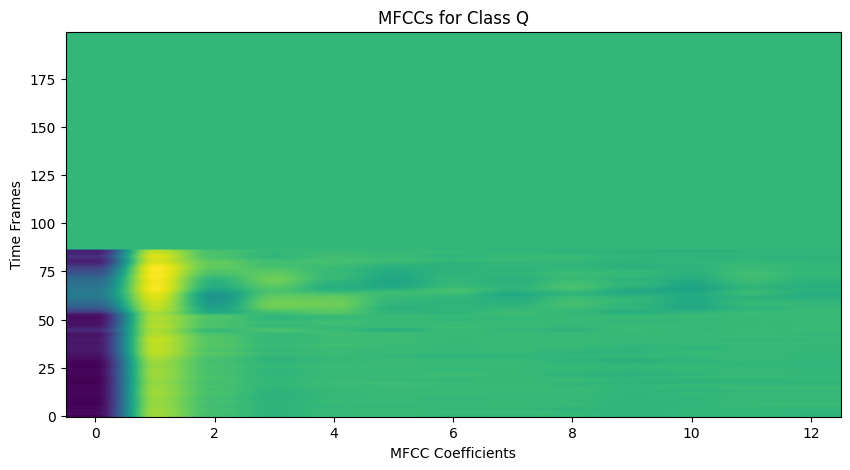

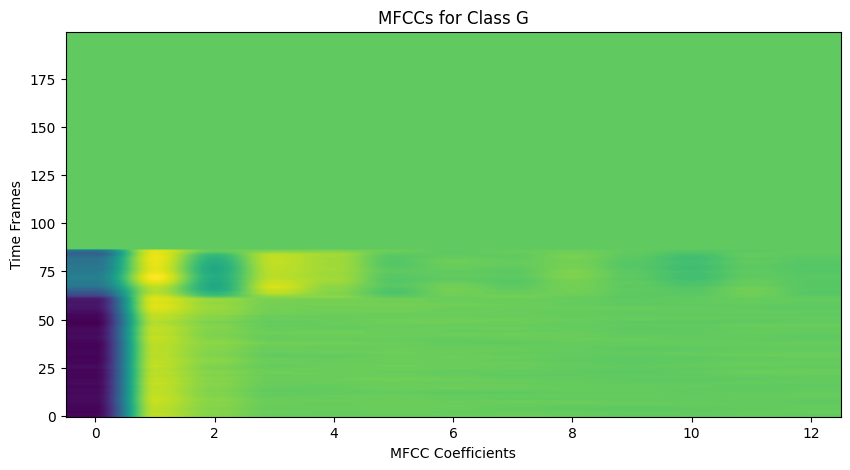

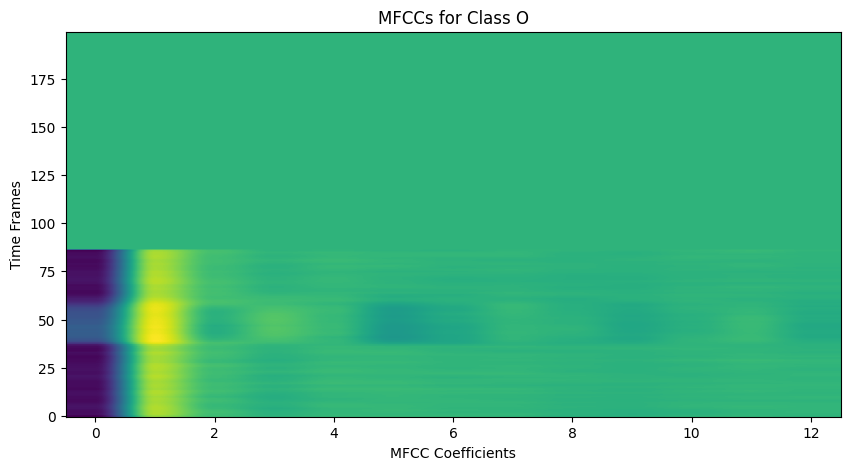

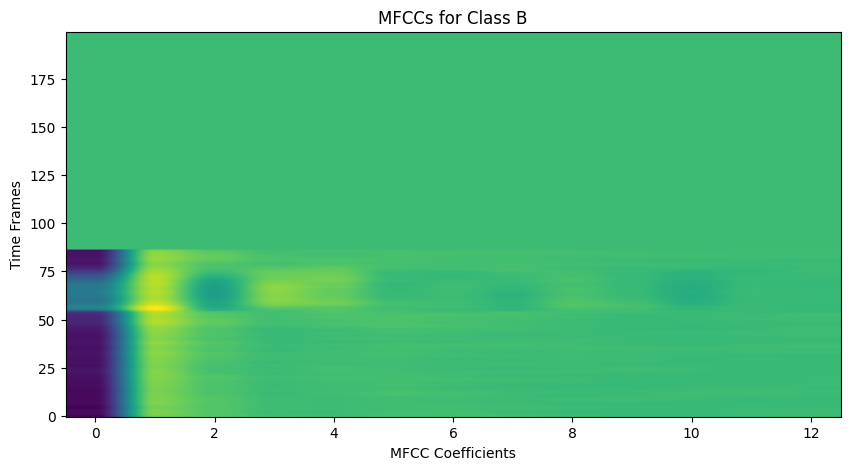

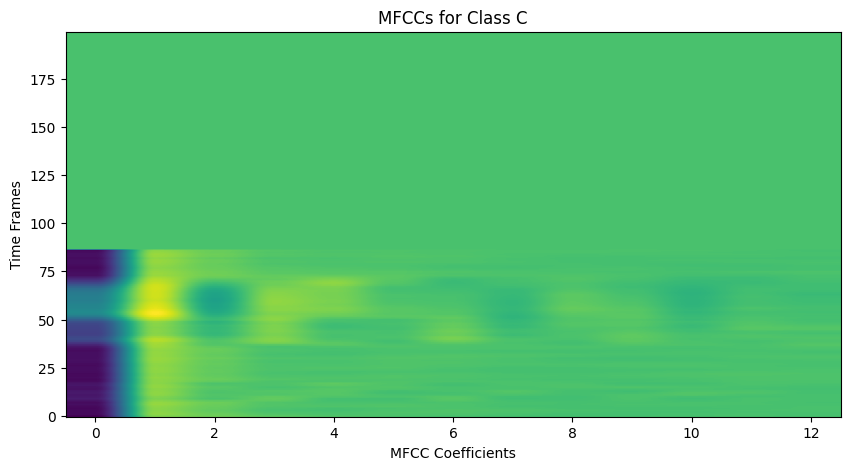

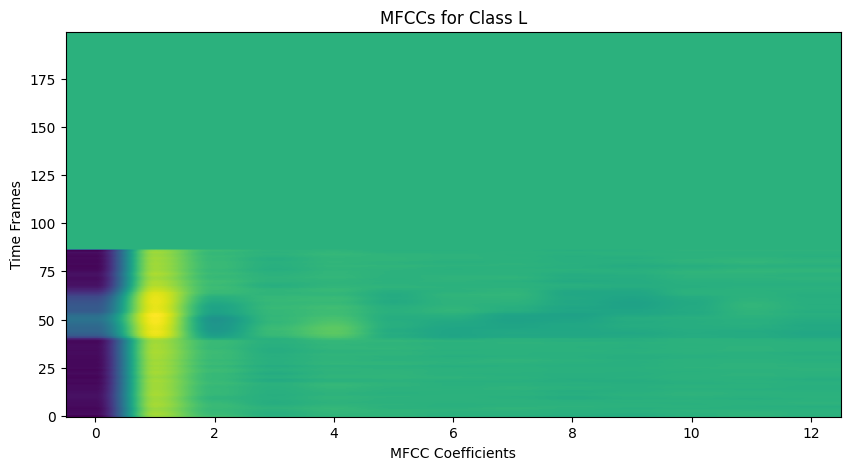

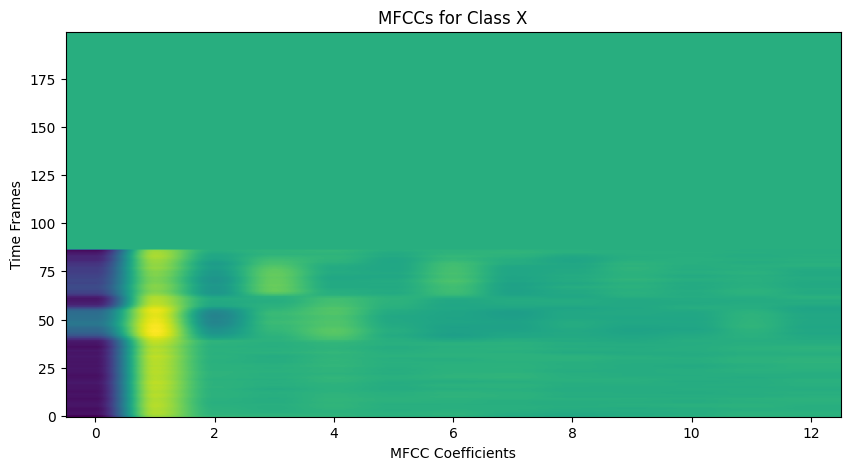

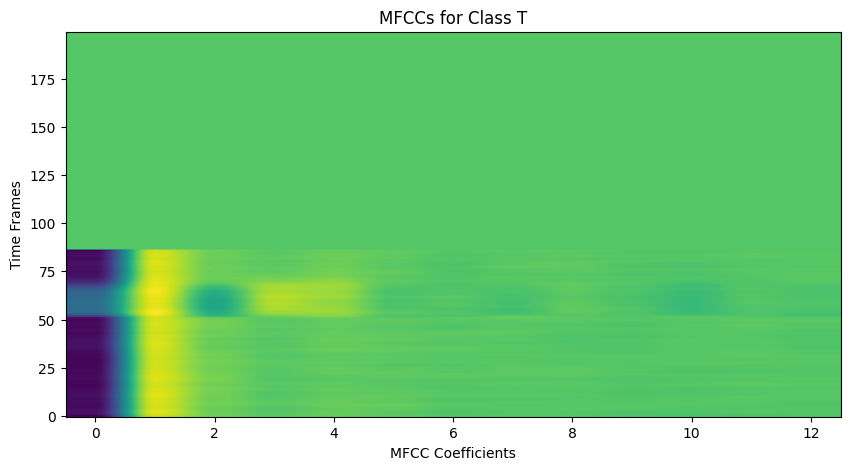

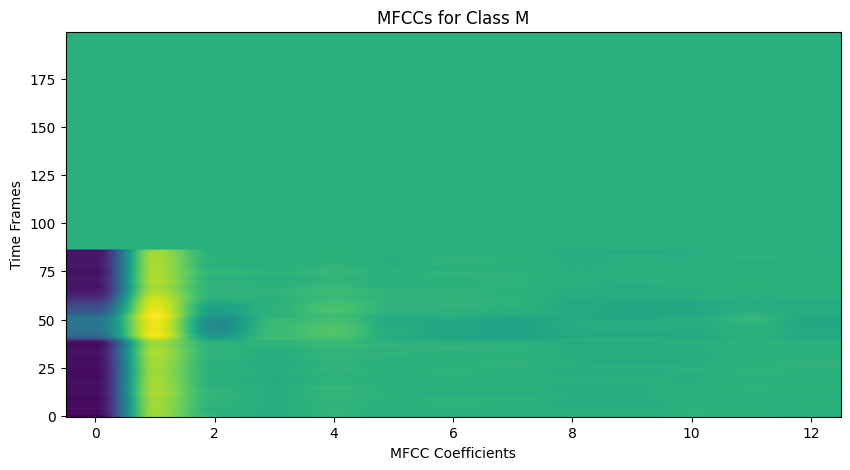

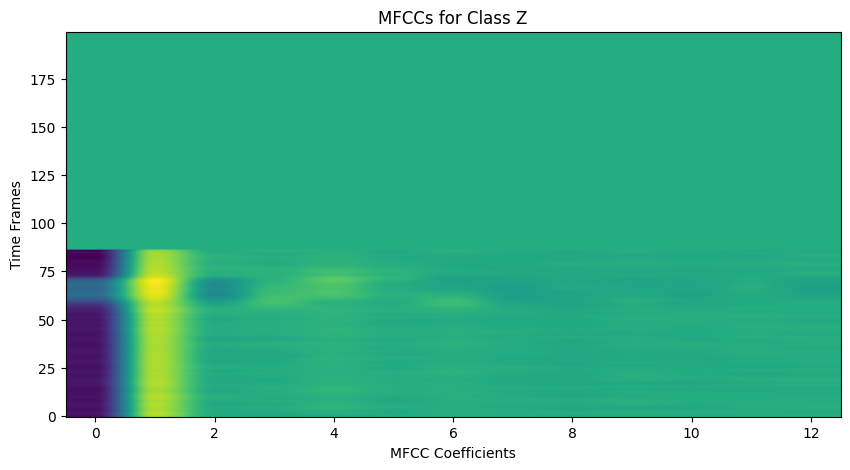

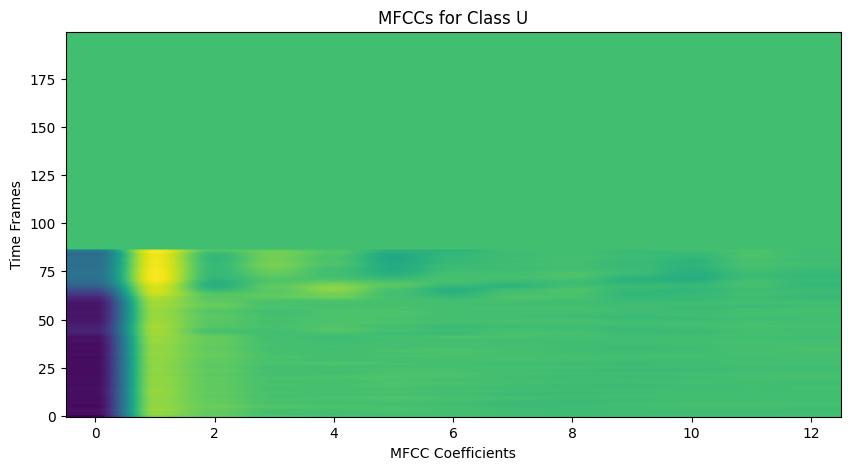

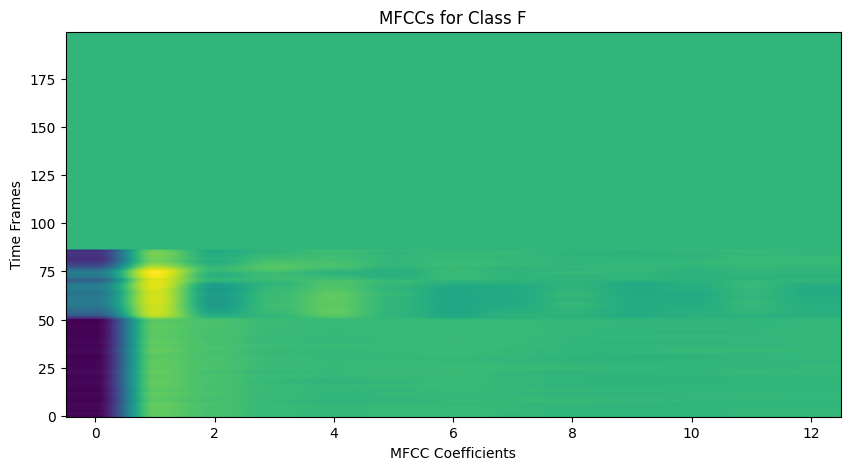

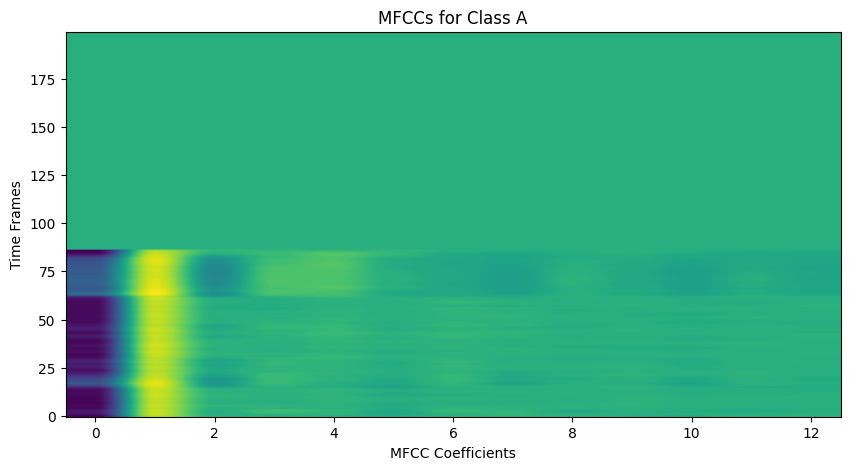

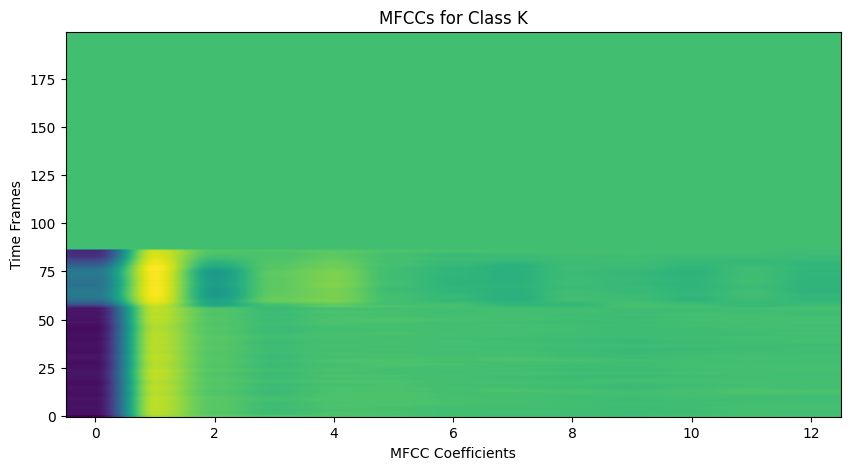

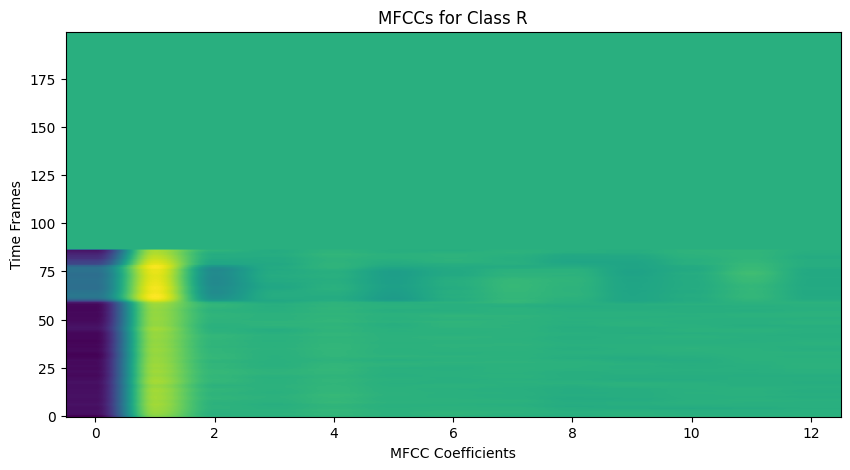

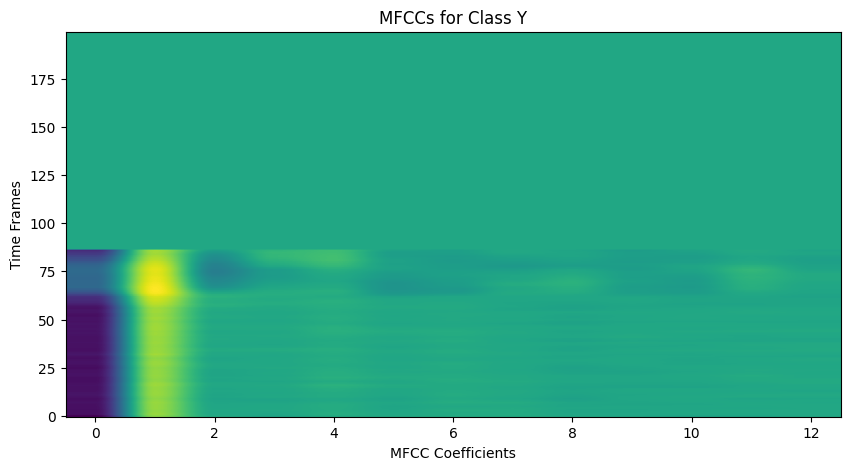

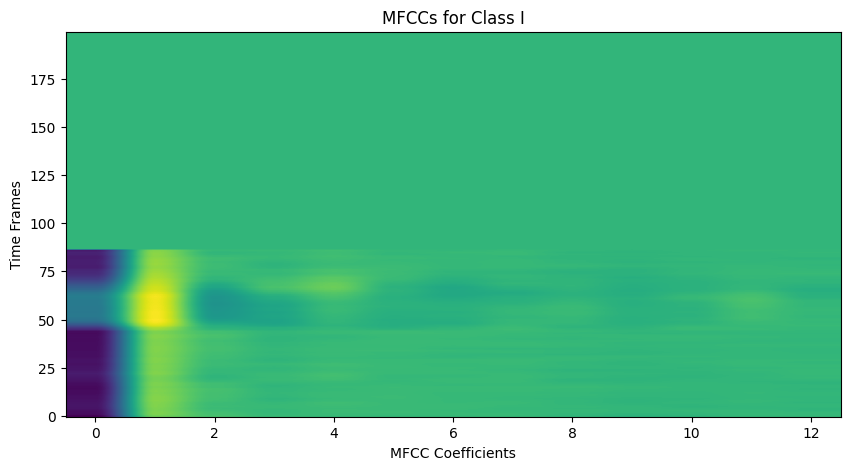

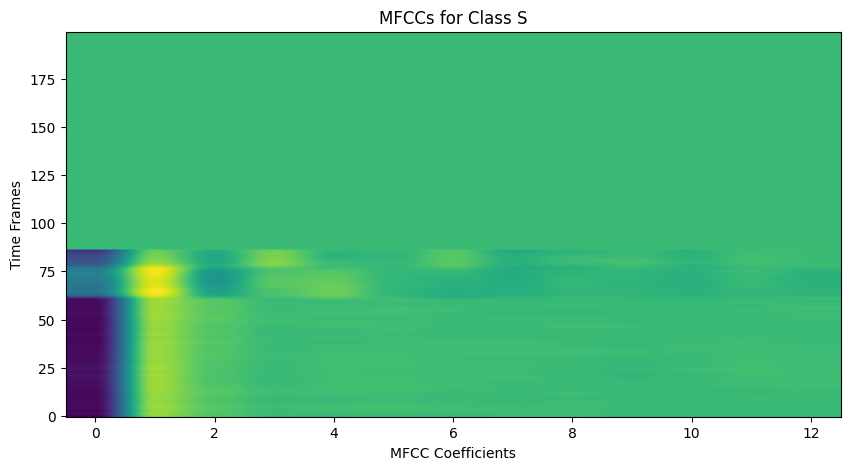

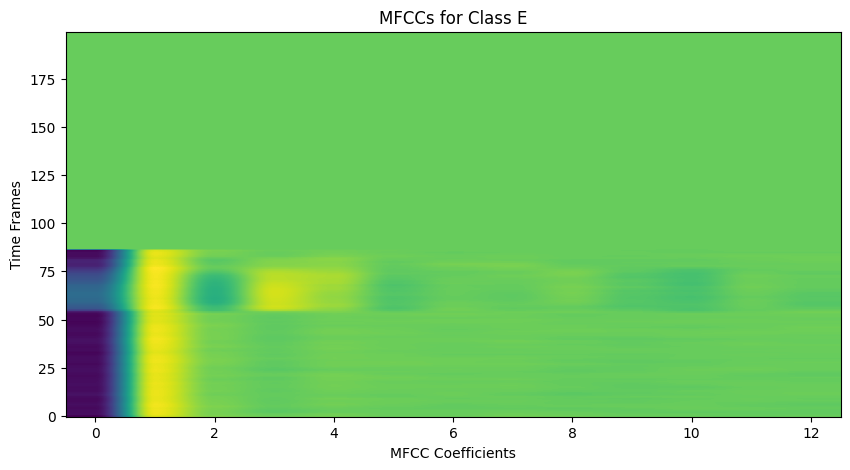

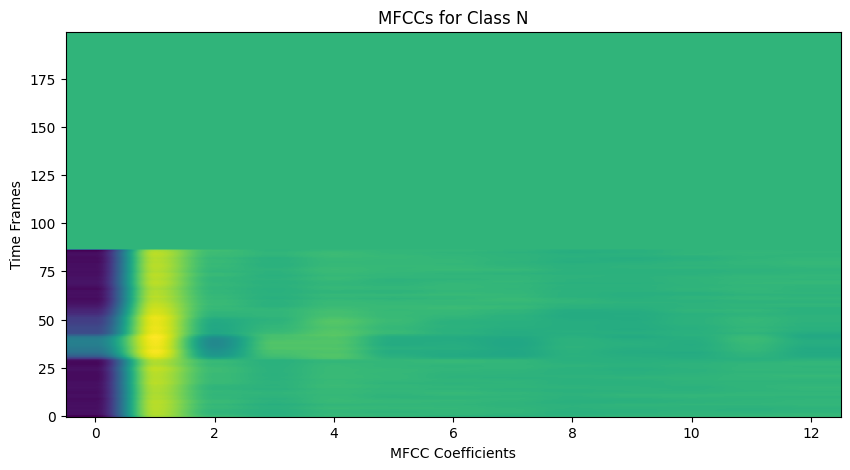

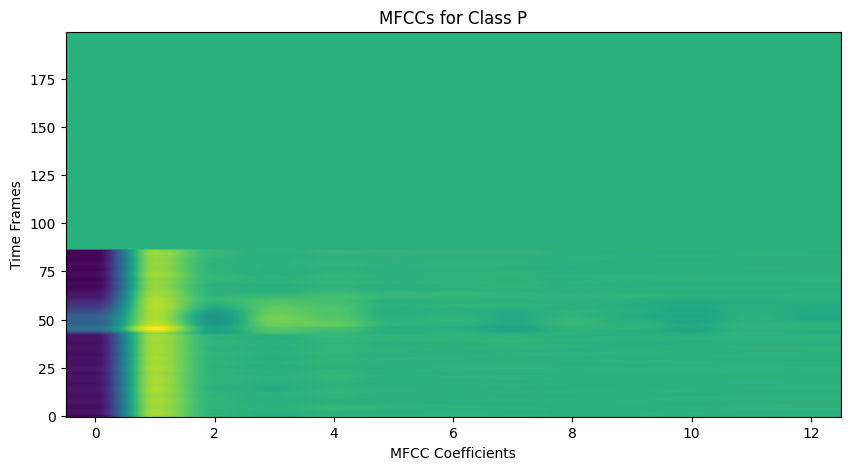

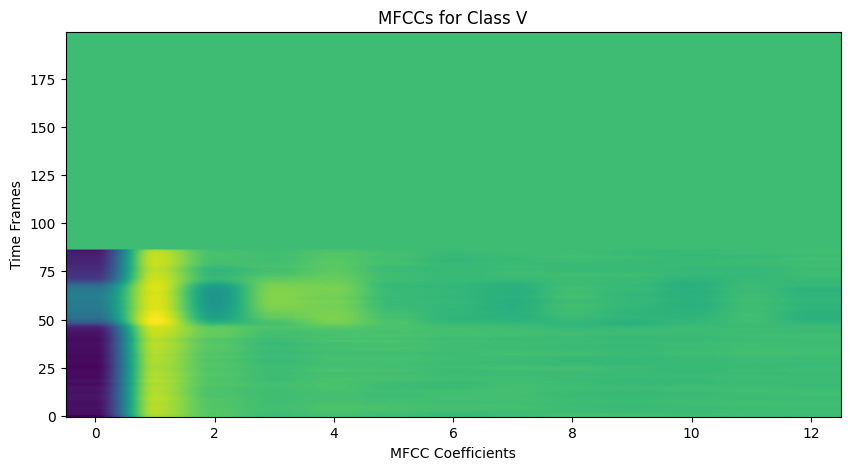

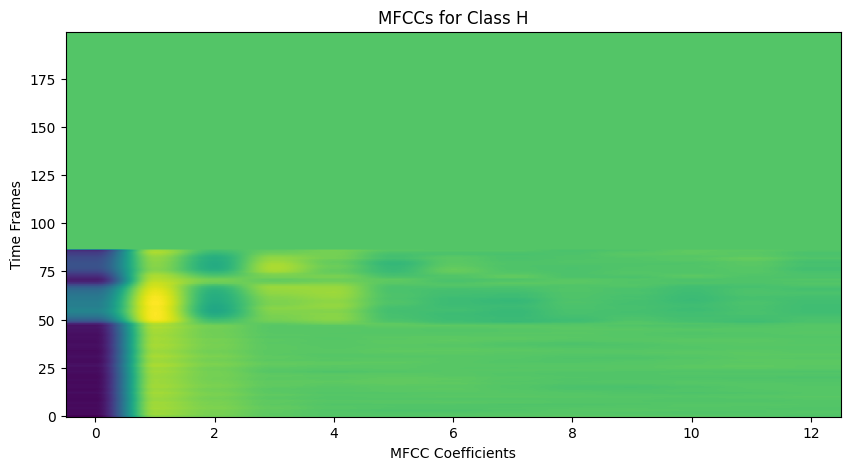

In [ ]:
base_data_dir = "/content/drive/MyDrive/THESIS/Dataset"

# Initialize empty lists for features and labels
features = []
labels = []

duration = 1  # Duration in seconds
frame_rate = 100  # Frames per second
max_sequence_length = 200  # Set the desired fixed length for padding

for class_number in range(1, 27):
    # Convert class_number to a corresponding uppercase letter using ASCII value
    class_folder = os.path.join(base_data_dir, f"{chr(class_number + 64)}")

    # Loop through each audio file within the folder
    for audio_file in os.listdir(class_folder):
        if audio_file.endswith(".mp3"):
            audio_path = os.path.join(class_folder, audio_file)

            # Load audio with the specified duration
            y, sr = librosa.load(audio_path, sr=None, duration=duration)

            # Extract MFCCs with 13 features and a fixed length of max_sequence_length
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            mfccs_padded = pad_sequences([mfccs.T], maxlen=max_sequence_length, padding='post', dtype='float32')[0]

            # Append features and labels
            features.append(mfccs_padded)
            labels.append(f"{chr(class_number + 64)}")

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_onehot = to_categorical(labels_encoded)

# Create a dictionary to store features for each class
class_features = {label: [] for label in set(labels)}

# Associate each feature with its corresponding class label
for i in range(len(features)):
    class_label = labels[i]
    class_features[class_label].append(features[i])

# Visualize features for each class
for class_label, class_feature_list in class_features.items():
    # Plot or visualize features for the current class
    plt.figure(figsize=(10, 5))
    plt.title(f"MFCCs for Class {class_label}")

    # Example: Plot the first feature for the first sample of each class
    plt.imshow(class_feature_list[0], cmap='viridis', aspect='auto', origin='lower')
    plt.xlabel("MFCC Coefficients")
    plt.ylabel("Time Frames")

    plt.show()


# **Naive Bayes Classifier**

Accuracy: 0.7582

Confusion Matrix:
[[ 2  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  1  0  0
   0  0]
 [ 1  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  2  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 1  0  0  2  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  3  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  1  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  2  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  1  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  

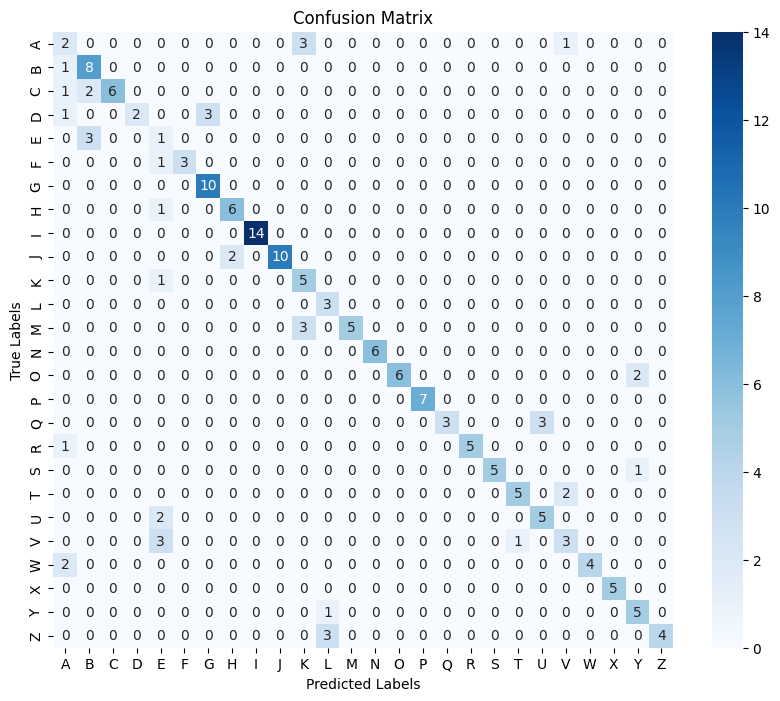

In [ ]:
X = np.array(features)
y = np.array(labels_encoded)
# Flatten the features to 2D
X_flat = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Reshape the test set for predictions
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test_flat)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


# Calculate the metrics
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average='weighted')
recall_nb = recall_score(y_test, y_pred, average='weighted')
f1_nb = f1_score(y_test, y_pred, average='weighted')

# Display the metrics
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




# Create lists for plotting
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision_nb, recall_nb, f1_nb]




# **Random Forest**


Results for Random Forest Classifier:
Accuracy: 1.0000

Confusion Matrix:
[[ 6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]
 [ 0  0  0  

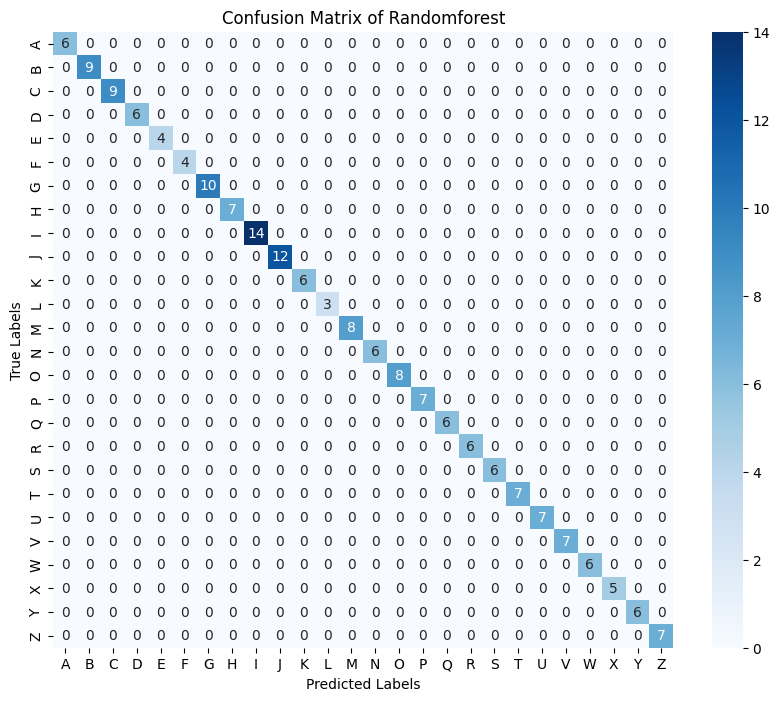

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier




# Flatten the features to 2D
X2_flat = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_flat, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
random_forest_classifier.fit(X2_train, y2_train)

# Reshape the test set for predictions
X2_test_flat = X2_test.reshape(X2_test.shape[0], -1)

# Make predictions on the test set
y2_pred_rf = random_forest_classifier.predict(X2_test_flat)

# Evaluate the classifier
accuracy_rf = accuracy_score(y2_test, y2_pred_rf)
conf_matrix_rf = confusion_matrix(y2_test, y2_pred_rf)
classification_rep_rf = classification_report(y2_test, y2_pred_rf)

# Display the results for Random Forest
print("\nResults for Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(classification_rep_rf)




# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix of Randomforest")
plt.xlabel("Predicted Labels")

plt.ylabel("True Labels")
plt.show()


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the metrics
accuracy_rf = accuracy_score(y2_test, y2_pred_rf)
precision_rf = precision_score(y2_test, y2_pred_rf, average='weighted')
recall_rf = recall_score(y2_test, y2_pred_rf, average='weighted')
f1_rf = f1_score(y2_test, y2_pred_rf, average='weighted')

# Display the metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

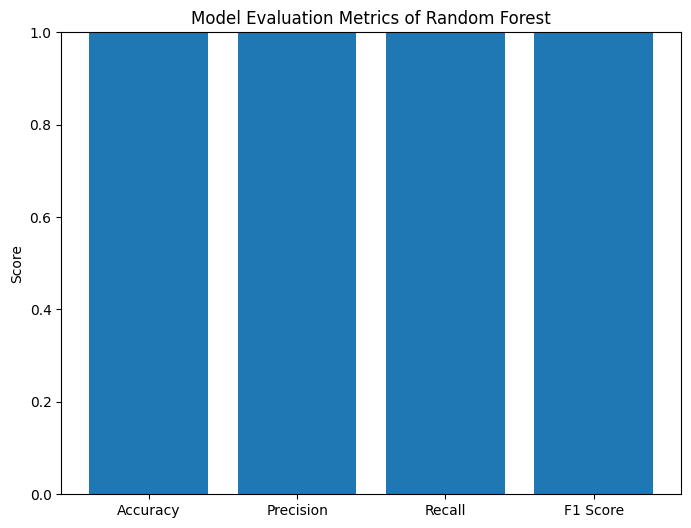

In [ ]:

# Create lists for plotting
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(categories, scores)
plt.ylim(0, 1)  # Set y-axis limit to represent percentages (0 to 1)
plt.title('Model Evaluation Metrics of Random Forest')
plt.ylabel('Score')
plt.show()

# **Gradient Boosting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X3_flat is your features for Gradient Boosting
# Adjust this according to your data
X3 = np.array(features)
y3 = np.array(labels_encoded)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


# Split the data into training and testing sets
X3_train_flat = X3_train.reshape(X3_train.shape[0], -1)
X3_test_flat = X3_test.reshape(X3_test.shape[0], -1)

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Train the classifier
gb_classifier.fit(X3_train_flat, y3_train)

# Make predictions on the test set
y3_pred_gb = gb_classifier.predict(X3_test_flat)

# Evaluate the classifier
accuracy_gb = accuracy_score(y3_test, y3_pred_gb)
conf_matrix_gb = confusion_matrix(y3_test, y3_pred_gb)
classification_rep_gb = classification_report(y3_test, y3_pred_gb)


# Display the results for Gradient Boosting
print("\nResults for Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_gb)
print("\nClassification Report:")
print(classification_rep_gb)


In [ ]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix of GradientBoosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy for Support Vector Machine (SVM)
accuracy_gb = accuracy_score(y3_test, y3_pred_gb)

# Calculate precision, recall, and F1 score for Support Vector Machine (SVM)
precision_gb = precision_score(y3_test, y3_pred_gb, average='weighted')
recall_gb = recall_score(y3_test, y3_pred_gb, average='weighted')
f1_score_gb = f1_score(y3_test, y3_pred_gb, average='weighted')

# Display the results
print("\nMetrics for Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_score_gb:.4f}")



# Create lists for plotting
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_gb, precision_gb, recall_gb, f1_score_gb]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(categories, scores)
plt.ylim(0, 1)  # Set y-axis limit to represent percentages (0 to 1)
plt.title('Model Evaluation Metrics of Gradient Boosting')
plt.ylabel('Score')
plt.show()

NameError: name 'y3_test' is not defined

# **SVM**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


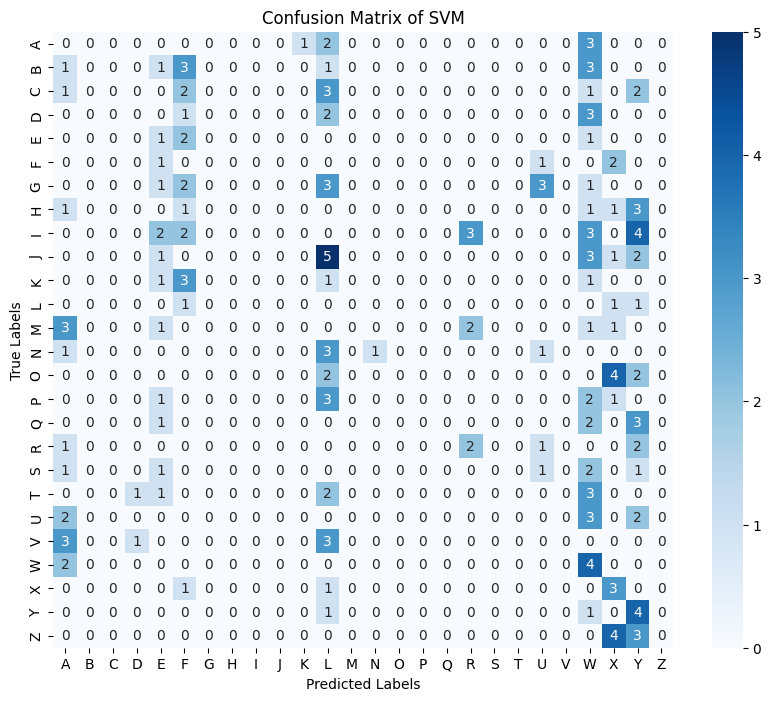

In [ ]:
from sklearn.svm import SVC

# Assuming X3_train and X3_test are 3D arrays
# If needed, you can reshape or flatten your data
X4 = np.array(features)
y4 = np.array(labels_encoded)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
X4_train_flat = X4_train.reshape(X4_train.shape[0], -1)
X4_test_flat = X4_test.reshape(X4_test.shape[0], -1)

# Initialize the Support Vector Machine (SVM) classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X4_train_flat, y4_train)

# Make predictions on the test set
y4_pred_svm = svm_classifier.predict(X4_test_flat)


conf_matrix_svm = confusion_matrix(y4_test, y4_pred_svm)
classification_rep_svm = classification_report(y4_test, y4_pred_svm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix of SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()





Metrics for Support Vector Machine (SVM) Classifier:
Accuracy: 0.0824
Precision: 0.0567
Recall: 0.0824
F1 Score: 0.0428


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


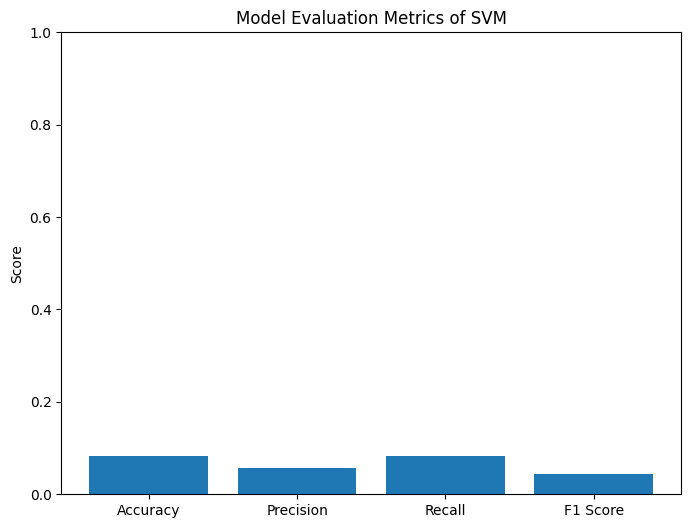

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy for Support Vector Machine (SVM)
accuracy_svm = accuracy_score(y4_test, y4_pred_svm)

# Calculate precision, recall, and F1 score for Support Vector Machine (SVM)
precision_svm = precision_score(y4_test, y4_pred_svm, average='weighted')
recall_svm = recall_score(y4_test, y4_pred_svm, average='weighted')
f1_score_svm = f1_score(y4_test, y4_pred_svm, average='weighted')

# Display the results
print("\nMetrics for Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_score_svm:.4f}")



# Create lists for plotting
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy_svm, precision_svm, recall_svm, f1_score_svm]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(categories, scores)
plt.ylim(0, 1)  # Set y-axis limit to represent percentages (0 to 1)
plt.title('Model Evaluation Metrics of SVM')
plt.ylabel('Score')
plt.show()

In [ ]:


# Load the trained Naive Bayes classifier
naive_bayes_classifier = GaussianNB()
# Assuming you have already trained the classifier and have features (X_train, y_train)

# Fit the classifier to the training data
naive_bayes_classifier.fit(X_train, y_train)

# Load the new audio file for prediction
new_audio_path = '/content/drive/MyDrive/THESIS/#TEST/B.mp3'  # Replace with the actual path
duration = 1  # Duration in seconds
max_sequence_length = 200  # Set the desired fixed length for padding

# Load audio with the specified duration
y, sr = librosa.load(new_audio_path, sr=None, duration=duration)

# Extract MFCCs with 13 features and a fixed length of max_sequence_length
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_padded = pad_sequences([mfccs.T], maxlen=max_sequence_length, padding='post', dtype='float32')[0]

# Reshape the features to match the training data format
X_new = mfccs_padded.reshape(1, -1)

# Make predictions
predicted_class_index = naive_bayes_classifier.predict(X_new)[0]

# Decode the predicted class index using the label encoder
predicted_class_label = label_encoder.classes_[predicted_class_index]

print(f"Predicted Class: {predicted_class_label}")

Predicted Class: E
